# Dataset #1

Get the first dataset with 30 attributes plus result from R. M. Mohammad. 

In [1]:
import pandas as pd

url="./dataset1.csv"
df=pd.read_csv(url)

df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


Get the row and column count for dataset #1. *Column count is not including result.*

In [49]:
print("Row count for dataset #1 :", str(df.shape[0]))
print("Column count for dataset #1 :", str(df.shape[1] - 1))

Row count for dataset #1 : 11055
Column count for dataset #1 : 30


# Dataset #2

Get the second dataset with 111 attributes plus result from Vrbančič.

In [2]:
url2="./dataset2.csv"
df2=pd.read_csv(url2)

df2.head(10)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,...,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3596,1,1,0,0,0,0
9,1,0,0,2,0,0,0,0,0,0,...,1,2,1,14397,1,0,0,0,0,1


Get the row and column count for dataset #2. *Column count is not including result.*

In [48]:
print("Row count for dataset #2 :", str(df2.shape[0]))
print("Column count for dataset #2 :", str(df2.shape[1] - 1))

Row count for dataset #2 : 88647
Column count for dataset #2 : 111


# Dataset #3

The original paper Dataset #3 is inspired from describes using the following:

    To train both models, a dataset of real and phishing URLs was constructed. In total, 2 million URLs were used in the training process. Half of them legitimate and half of them phishing. The legitimate URLs came from Common Crawl, a corpus of web crawl data. The phishing URLs came from Phishtank...
    


Using this dataset in place which is significantly smaller [this kaggle dataset](https://www.kaggle.com/kunal4892/phishingandlegitimateurls). We have 96,000 rows total as compared to the original experiment which contained 2 million rows. *Working on getting the original dataset to improve our results here.*

In [37]:
url3="./dataset3.csv"
df3=pd.read_csv(url3)

# Remove all columns except URL and label
df3 = df3.drop(df3.columns[[1,2,3,4,5,6,7,8,9,10]], axis=1)

df3.head(10)

,domain,label
0,www.voting-yahoo.com,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,0
2,tecportais.com/file-security-update-infonfmati...,1
3,bima.astro.umd.edu/nemo/linuxastro/,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,1
5,diannaopeizhi.com/js/,1
6,www.synchrotech.com/support/install.html,0
7,www.ansi.okstate.edu/breeds/swine/largeblackwh...,0
8,www.strum.co.uk/webbery/,0
9,www.grok2.com/vi-emacs.html,0


In [35]:
print("Row count for dataset #3 :", str(df3.shape[0]))
print("Column count for dataset #3 :", str(df3.shape[1] - 1))

Row count for dataset #3 : 95910
Column count for dataset #3 : 1


## Data Cleaning

On the first dataset convert value of -1 to 0 for result

In [16]:
df['Result'].values[df['Result'].values < 0] = 0

Next we will replace any missing values with the mean value for that column. This will be done for both datasets.

In [17]:
from sklearn.impute import SimpleImputer

# Use mean value for any nan values
df.fillna(df.mean(), inplace=True)
df2.fillna(df.mean(), inplace=True)

Next we will split both of our datasets into section for training and testing.

## Seperating the Data

Next we need to seperate each dataset into training and testing datasets.

In [39]:
from sklearn.model_selection import train_test_split

# split data up into training and test data
x = df.iloc[:,0:30].values.astype(int)
y = df.iloc[:,30].values.astype(int)

# split data up into training and test data
x2 = df2.iloc[:,0:111].values.astype(int)
y2 = df2.iloc[:,111].values.astype(int)

# split data up into training and test data
x3 = df3.iloc[:,0:1].values.astype(str)
y3 = df3.iloc[:,1].values.astype(str)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Logistic Regression as a Baseline Result

Import `numpy` and set a random seed so that random values will be the same each time we run this notebook.

In [19]:
import numpy as np

np.random.seed(7)

In order to create a baseline comparision for our neural network we'll do a round of logitstic regression with a maximum iteration of 10,000. We'll use our training and test set from each dataset to get an accuracy score for both datasets while using logistic regression.

This will be the baseline value to beat when using a neural network.

In [41]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)
y_pred=logisticRegr.predict(x_test)

logisticRegr2 = LogisticRegression(max_iter=10000)
logisticRegr2.fit(x_train2, y_train2)
y_pred2=logisticRegr2.predict(x_test2)

t = precision_recall_fscore_support(y_test, logisticRegr.predict(x_test), average='micro')
t2 = precision_recall_fscore_support(y_test2, logisticRegr2.predict(x_test2), average='micro')

NameError: name 'precision_recall_fscore_support' is not defined

## Result for Logistic Regression with Dataset #1

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9240162822252375
Precision: 0.9276160503540519
Recall: 0.9394422310756972


## Result for Logistic Regression with Dataset #2

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))

Accuracy: 0.9217146080090243
Precision: 0.8633988936693301
Recall: 0.9184373978424322


## Result for Logistic Regression with Dataset #3

As we've removed all attributes from our URLs for dataset #3 and are only left with a string for each row logistic regression will not be particularly useful as it requires first converting the string to a float.

# Neural Networks

Next we'll move to using our same datasets with a neural network. We're using 2 different rectified linear unit layers each with a slightly different amount of neurons. The results from these 2 layers arrives sequentially at the last layer sigmoid which produces a prediction. The sigmoid layer always produces a value between 0 and 1 which is useful in making our prediction.

## Neural Network for Dataset #1

In [44]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

# Model building using the Sequential API
model = Sequential()

# This model actually seems to work better with higher numbers
model.add(Dense(400, activation='relu',
          kernel_initializer='uniform',input_dim=x.shape[1]))
model.add(Dense(480, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid',
          kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

## Experimenting with Neurons and Layers for Dataset #1

We have experimented with a variety of values for the dense layers above.

*Running the same parameters multiple times can result in slightly different results.*

### 1 Layer

L1 Neurons | L2 Neurons | Accuracy
--- | --- | ---
20 | 1 | 94.14%
30 | 1 | 95.25%
40 | 1 | 95.48%
50 | 1 | 95.93%
60 | 1 | 95.88%
70 | 1 | 96.02%
80 | 1 | 95.93%
100 | 1 | 96.02%
120 | 1 | 96.70%
140 | 1 | 96.56%
180 | 1 | 96.34%
400 | 1 | 96.61%
600 | 1 | 96.43%
800 | 1 | 96.74%
1000 | 1 | 96.65%
1200 | 1 | 96.16%
1600 | 1 | 96.34%
2000 | 1 | 96.07%
2200 | 1 | 96.65%
**2300** | **1** | **97.11%**
2400 | 1 | 96.83%
3200 | 1 | 96.20%
4600 | 1 | 96.56%
6900 | 1 | 96.79%
9200 | 1 | 96.74%
11500 | 1 | 96.52%

We took the best 2300 neurons result and ran it again 10 time.

*96.47%, 97.01%, 96.34%, 96.56%, 96.70%, 96.43%, 96.88%, 96.38%, 96.83%, 96.92%*

average = 96.652%

We also took the second best result 2400 neurons and rain it again 5 times.

*96.61%, 96.47%, 96.92, 96.61, 96.34%*

average = 96.59%


*While 2300 yielded the highest result, we attempted to run the model with 2300 again 5 seperate times and each time the result was under 97%.*

### 2 Layers

L1 Neurons | L2 Neurons | L3 Neurons | Accuracy
--- | --- | --- | ---
30 | 40 | 1 | 95.52%
40 | 30 | 1 | 91.30%
30 | 50 | 1 | 91.30%
40 | 50 | 1 | 95.66%
50 | 60 | 1 | 96.20%
60 | 70 | 1 | 91.30%
100 | 120 | 1 | 96.25%
200 | 240 | 1 | 96.47%
**400** | **480** | **1** | **96.88%**
800 | 960 | 1 | 96.70%
1200 | 1300 | 1 | 91.30%
1600 | 1920 | 1 | 96.79%
3200 | 3840 | 1 | 96.83%
6400 | 7680 | 1 | 96.61%
6900 | 7680 | 1 | 96.38%
12800 | 15360 | 1 | 96.11%

We took the best result and ran it again 5 times. 

*96.70%, 96.97%, 97.29%, 96.83%, 96.61%, 96.16%, 96.92%, 96.25%, 96.34%, 96.83%*

average = 96.69%

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               12400     
_________________________________________________________________
dense_2 (Dense)              (None, 480)               192480    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 481       
Total params: 205,361
Trainable params: 205,361
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5, restore_best_weights=True)

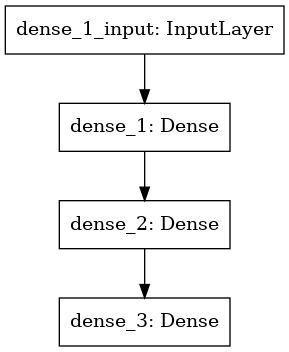

In [47]:
import tensorflow as tf
import keras

keras.utils.plot_model(model, to_file='model.png')

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores = model.evaluate(x_test, y_test)
print('\nAccuracy score of the Neural Network {0:.2f}%'.format(scores[1]*100))

## Experimenting with Neurons and Layers for Dataset #2

L1 Neurons | L2 Neurons | L3 Neurons | Accuracy
--- | --- | --- | ---
135 | 111 | 1 | 92.55%
145 | 111 | 1 | 92.30%
270 | 222 | 1 | 93.73%
540 | 444 | 1 | 91.84%
600 | 450 | 1 | 92.79%
600 | 500 | 1 | 92.24%
135 | 135 | 1 | 93.16%


L1 Neurons | L2 Neurons | L3 Neurons | Accuracy
--- | --- | --- | ---
111 | 135 | 1 | 92.70%
222 | 270 | 1 | 93.18%
450 | 600 | 1 | 93.53%
666 | 777 | 1 | 91.89%
900 | 1200 | 1 | 93.13%

Trying with 2 instead of 3 layers.

L1 Neurons | L2 Neurons | Accuracy
--- | --- | --- 
111 | 1 | 92.30%
135 | 1 | 93.05%
270 | 1 | 92.38%
540 | 1 | 93.07%
1080 | 1 | 92.42%


Trying with 4 instead of 3 layers.


L1 Neurons | L2 Neurons | L3 Neurons | L4 Neurons | Accuracy
--- | --- | --- | --- | ---
111 | 111 | 111 | 1 | 93.46%
**135** | **135** | **135** | **1** | **93.92%**
270 | 222 | 135 | 1 | 93.38%
166 | 166 | 166 | 1 | 93.72%
270 | 270 | 270 | 1 | 93.65%
600 | 270 | 135 | 1 | 92.60%
888 | 888 | 888 | 1 | 93.31%
160 | 150 | 140 | 1 | 93.59%
140 | 140 | 140 | 1 | 93.79%
130 | 130 | 130 | 1 | 92.99%
135 | 270 | 600 | 1 | 93.55%


Trying with 5 layers


L1 Neurons | L2 Neurons | L3 Neurons | L4 Neurons | L5 Neurons | Accuracy
--- | --- | --- | --- | --- | ---
135 | 135 | 135 | 135 | 1 | 92.26%
140 | 140 | 140 | 140 | 1 | 93.95%
145 | 145 | 145 | 145 | 1 | 93.63%
166 | 166 | 166 | 166 | 1 | 93.67%
270 | 270 | 270 | 270 | 1 | 93.81%
280 | 280 | 280 | 280 | 1 | 93.78%
135 | 270 | 500 | 1000 | 1 | 94.02%
135 | 270 | 540 | 1080 | 1 | 92.45%
140 | 280 | 540 | 1080 | 1 | 93.50%
270 | 560 | 1080 | 2160 | 1 | 93.07%

## Neural Network for Dataset #2

In [199]:
# Model building using the Sequential API
model2 = Sequential()

model2.add(Dense(135, activation='relu',
          kernel_initializer='uniform',input_dim=x2.shape[1]))
model2.add(Dense(270, activation='relu',
          kernel_initializer='uniform'))
model2.add(Dense(540, activation='relu',
          kernel_initializer='uniform'))
model2.add(Dense(1080, activation='relu',
          kernel_initializer='uniform'))
model2.add(Dense(1,  activation='sigmoid',
          kernel_initializer='uniform'))

model2.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [172]:
model2.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 270)               30240     
_________________________________________________________________
dense_132 (Dense)            (None, 270)               73170     
_________________________________________________________________
dense_133 (Dense)            (None, 270)               73170     
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 271       
Total params: 176,851
Trainable params: 176,851
Non-trainable params: 0
_________________________________________________________________


In [200]:
history2 = model2.fit(x_train2, y_train2, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores2 = model2.evaluate(x_test2, y_test2)
print('\nAccuracy score of the Neural Network {0:.2f}%'.format(scores2[1]*100))

Epoch 1/128
70917/70917 [==============================] - 27s 379us/step - loss: 0.7101 - accuracy: 0.7686
Epoch 2/128
70917/70917 [==============================] - 26s 371us/step - loss: 0.2798 - accuracy: 0.8875
Epoch 3/128
70917/70917 [==============================] - 27s 380us/step - loss: 0.2320 - accuracy: 0.9034
Epoch 4/128
70917/70917 [==============================] - 27s 387us/step - loss: 0.2227 - accuracy: 0.9065
Epoch 5/128
70917/70917 [==============================] - 29s 413us/step - loss: 0.2207 - accuracy: 0.9065
Epoch 6/128
70917/70917 [==============================] - 38s 533us/step - loss: 0.2095 - accuracy: 0.9132
Epoch 7/128
70917/70917 [==============================] - 62s 874us/step - loss: 0.2034 - accuracy: 0.9154
Epoch 8/128
70917/70917 [==============================] - 62s 878us/step - loss: 0.1996 - accuracy: 0.9176
Epoch 9/128
70917/70917 [==============================] - 71s 997us/step - loss: 0.1982 - accuracy: 0.9174
Epoch 10/128
70917/70917 [==

## Experimenting with Neurons and Layers for Dataset #3

In [54]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.optimizers import *

# Model building using the Sequential API
model3 = Sequential()
model3.add(Dense(10, activation='relu',
          kernel_initializer='uniform',input_dim=x3.shape[1]))

# Add a LSTM layer with 128 internal units.
model3.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model3.add(layers.Dense(10))


model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

ValueError: Input 0 is incompatible with layer lstm_1: expected ndim=3, found ndim=2

TDLHBA hyperparameters

In [204]:
model_TDLHBA = Sequential()

model_TDLHBA.add(Dense(400, activation='relu',
          kernel_initializer='uniform',input_dim=x.shape[1]))
model_TDLHBA.add(Dense(480, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

adam = Adam(lr=0.0017470)
model_TDLHBA.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [205]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 21        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [206]:
history_TDLHBA = model_TDLHBA.fit(x_train, y_train, batch_size=10, epochs=100, verbose=1, callbacks=[es_cb])

scores = model_TDLHBA.evaluate(x_test, y_test)
print('\nAccuracy score of the Neural Network with TDLHBA hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/100
8844/8844 [==============================] - 4s 484us/step - loss: 0.1924 - accuracy: 0.9254
Epoch 2/100
8844/8844 [==============================] - 4s 451us/step - loss: 0.1463 - accuracy: 0.9403
Epoch 3/100
8844/8844 [==============================] - 4s 458us/step - loss: 0.1289 - accuracy: 0.9452
Epoch 4/100
8844/8844 [==============================] - 4s 457us/step - loss: 0.1151 - accuracy: 0.9505
Epoch 5/100
8844/8844 [==============================] - 4s 452us/step - loss: 0.1108 - accuracy: 0.9549
Epoch 6/100
8844/8844 [==============================] - 4s 454us/step - loss: 0.0959 - accuracy: 0.9590
Epoch 7/100
8844/8844 [==============================] - 4s 467us/step - loss: 0.0854 - accuracy: 0.9623
Epoch 8/100
8844/8844 [==============================] - 5s 514us/step - loss: 0.0804 - accuracy: 0.9642
Epoch 9/100
8844/8844 [==============================] - 5s 526us/step - loss: 0.0817 - accuracy: 0.9655
Epoch 10/100
8844/8844 [==============================]